<a href="https://colab.research.google.com/github/AhmedSaeed-ML/Supply-chain-Data-Analysis/blob/main/Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Domain knowledge - Heart Attack

In [799]:
# 1   Age (in years)
# 2   Sex: gender (1 = male; 0 = female)
# 3   Chest Pain type
#                    1  typical angina (all criteria present)
#                    2  atypical angina (two of three criteria satisfied)
#                    3  non-anginal pain (less than one criteria
#                    4  asymptomatic (none of the criteria are satisfied)
# 4   Restbps: Resting Blood pressure (in mmHg, upon admission to the hospital)
# 5   Chol: serum cholesterol in mg/dL
# 6   Fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false
# 7   RestECG: Resting electrocardiogram results
#                    0  normal
#                    1  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#                    2  showing probable or definite left ventricular hypertrophy by Estes' criteria
# 8   MaxHR: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.
# 9   Exang: exercise induced angina (1 = yes; 0 = no)
# 10  Oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)
# 11  Slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia
#                    1  upsloping
#                    2  flat
#                    3  downsloping
# 12  Ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).
#         a higher number usually indicates more severe disease
# 13  thall:         0 = normal
#                    1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest)
#                    2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)
# 14  target:        0 = no disease 1 = disease


# Import Libraries

In [800]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import time
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import xgboost as xgb

# Data Frame

In [801]:
file="/content/drive/MyDrive/Ahmed /Heart Attack Data Set.csv"
df=pd.read_csv(file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [802]:
df.shape

(303, 14)

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [804]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#  Data Quality

## Completeness

In [805]:
# Checking missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values ​​in all columns.")
else:
    columns_with_missing = missing_values[missing_values > 0]
    for column, count in columns_with_missing.items():
        total = len(df)
        percentage = (count / total) * 100
        print(f"Column '{column}' has {count} missing values out of {total} ({percentage:.2f}%)")

There are no missing values ​​in all columns.


## Uniqueness

In [806]:
# Checking duplicates
duplicates=df[df.duplicated()]
print (duplicates.shape)
df[df.duplicated()]

(1, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [807]:
# Dropping duplicates
df=df.drop_duplicates()

## Consistency

In [808]:
# Converting encoded data back to its original form
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [809]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [810]:
df["target"].unique()

array([1, 0])

In [811]:
# Columns Mapping
sex={1 : "male", 0 : "female"}
df["sex"]=df["sex"].map(sex)

fbs={1 : "True", 0 : "False"}
df["fbs"]=df["fbs"].map(fbs)

cp={0:"typical angina",
    1:"atypical angina",
    2:"non-anginal pain",
    3:"asymptomatic"}
df["cp"]=df["cp"].map(cp)

restecg={ 0: "normal",1: "ST-T wave abnormality",2: "left ventricular hypertrophy"}
df["restecg"]=df["restecg"].map(restecg)

slope={  1: "upsloping" , 2: "flat" , 3: "downsloping"}
df["slope"]=df["slope"].map(slope)

thal= {0 : "normal", 1 : "fixed defect" , 2 : "reversible defect", 3:"Unknown"}
df["thal"]=df["thal"].map(thal)

exang={1 : "yes", 0 : "no"}
df["exang"]=df["exang"].map(exang)

target={1 : "disease", 0 : "no diseasee"}
df["target"]=df["target"].map(target)


<ipython-input-811-6672658a6ef8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-811-6672658a6ef8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-811-6672658a6ef8>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-811-66

In [812]:
print(df["target"].value_counts())

target
disease        164
no diseasee    138
Name: count, dtype: int64


In [813]:
for i in df.select_dtypes("object").columns:
  print(df[i].value_counts())
  print("-"*50)

sex
male      206
female     96
Name: count, dtype: int64
--------------------------------------------------
cp
typical angina      143
non-anginal pain     86
atypical angina      50
asymptomatic         23
Name: count, dtype: int64
--------------------------------------------------
fbs
False    257
True      45
Name: count, dtype: int64
--------------------------------------------------
restecg
ST-T wave abnormality           151
normal                          147
left ventricular hypertrophy      4
Name: count, dtype: int64
--------------------------------------------------
exang
no     203
yes     99
Name: count, dtype: int64
--------------------------------------------------
slope
flat         141
upsloping    140
Name: count, dtype: int64
--------------------------------------------------
thal
reversible defect    165
Unknown              117
fixed defect          18
normal                 2
Name: count, dtype: int64
--------------------------------------------------
target
dise

## Check Validity

In [814]:
for i in df.select_dtypes("number").columns:
  print("{}, {} -> {}".format(i,df[i].min(),df[i].max()))
  print("-"*50)

age, 29 -> 77
--------------------------------------------------
trestbps, 94 -> 200
--------------------------------------------------
chol, 126 -> 564
--------------------------------------------------
thalach, 71 -> 202
--------------------------------------------------
oldpeak, 0.0 -> 6.2
--------------------------------------------------
ca, 0 -> 4
--------------------------------------------------


#Data Exploration

## Univariate Analysis

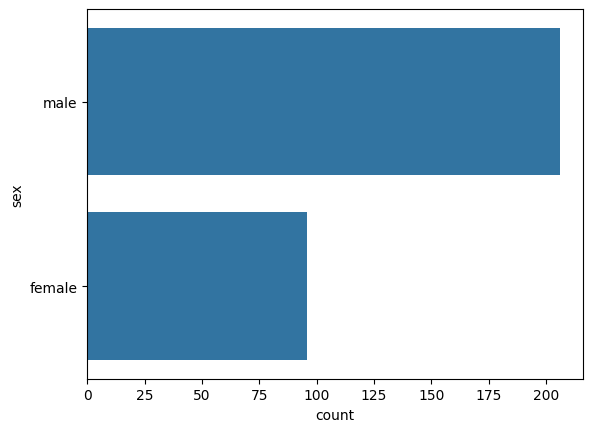

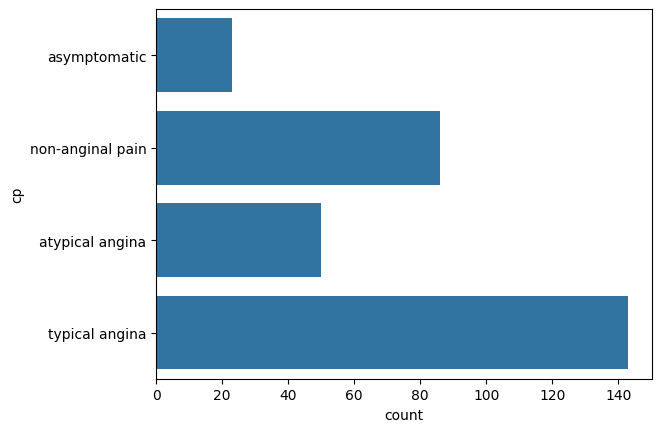

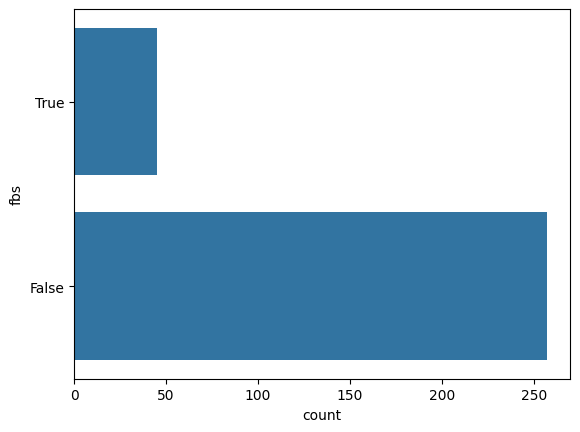

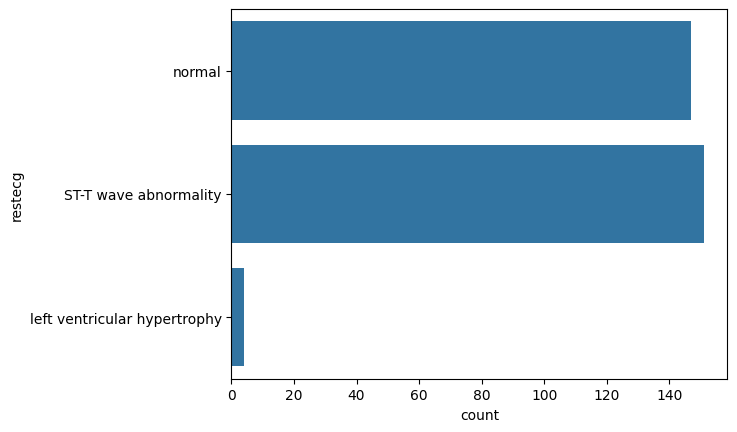

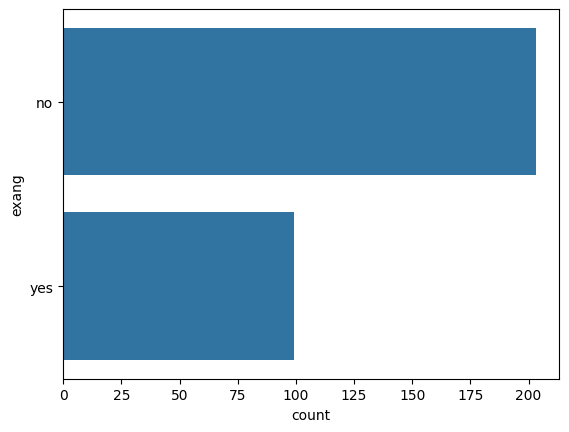

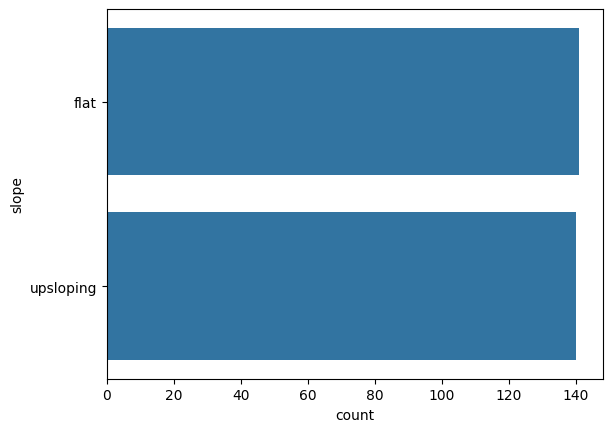

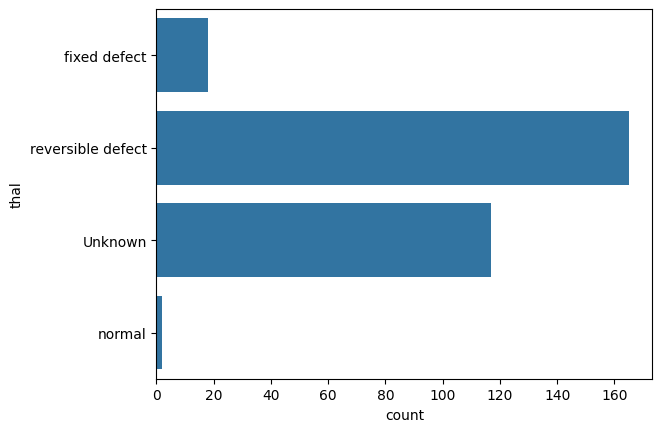

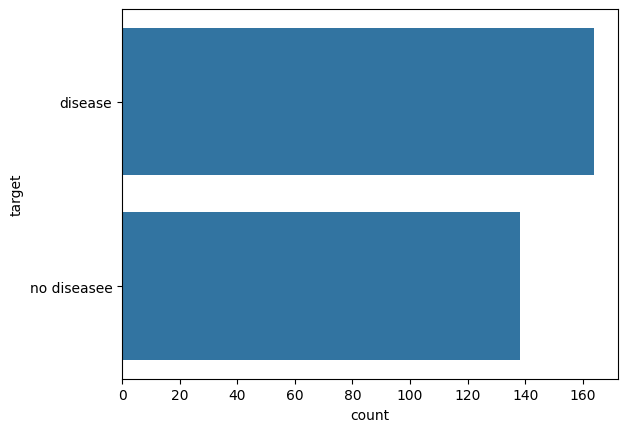

In [815]:
for i in df.select_dtypes("object"):
  sns.countplot(df[i])
  plt.show()

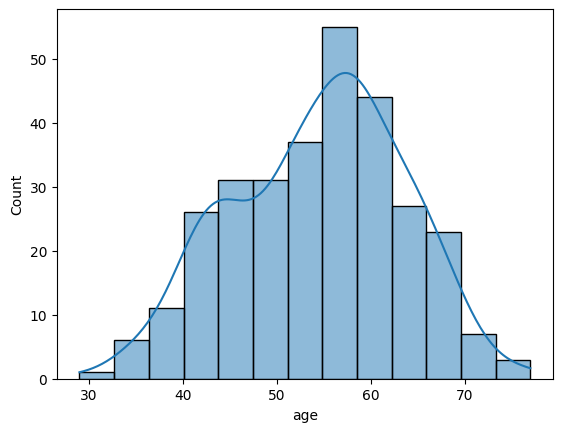

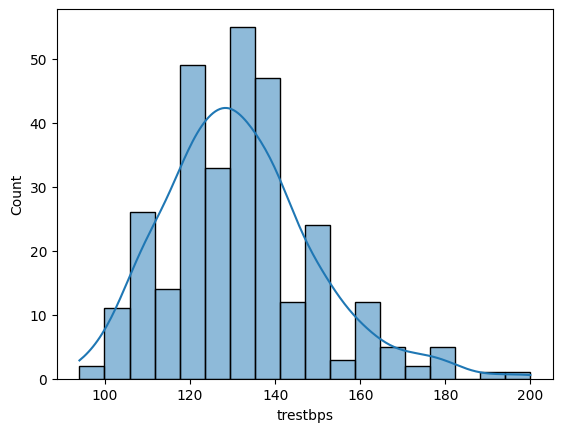

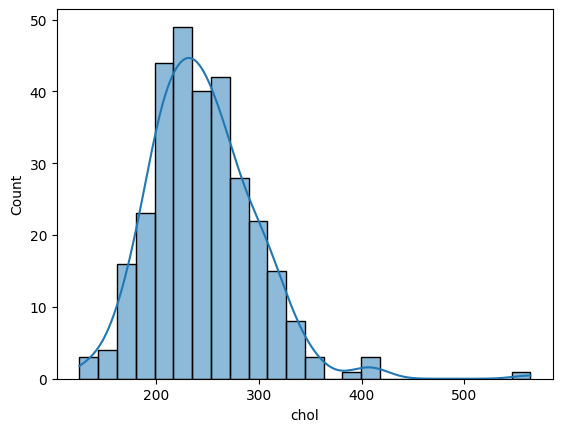

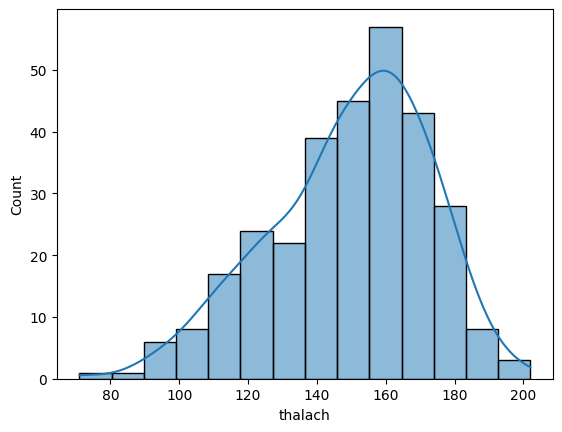

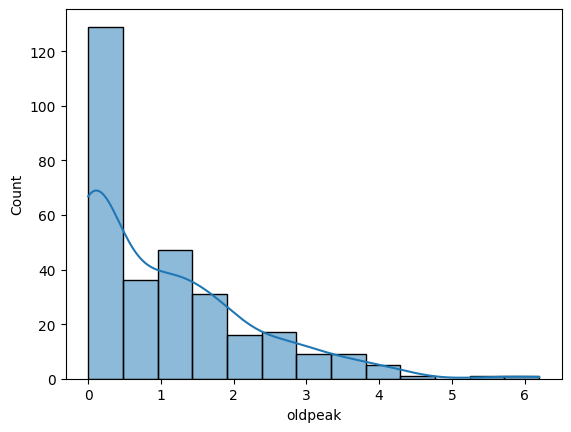

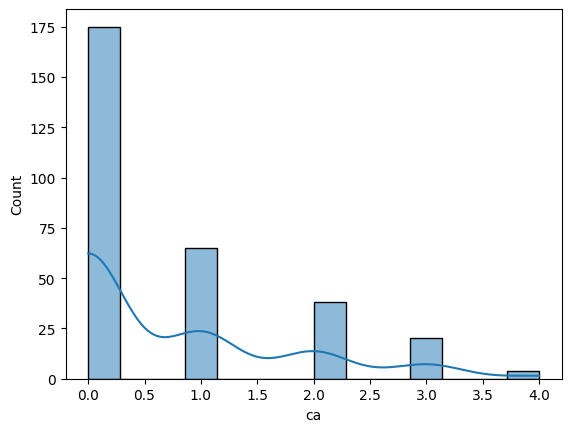

In [816]:
for i in df.select_dtypes("number"):
  sns.histplot(df[i],kde=True)
  plt.show()

In [817]:
for i in df.select_dtypes(include='number').columns:
  fig = px.box(df, y=i)
  fig.show()

## Bivariate Analysis

<Axes: >

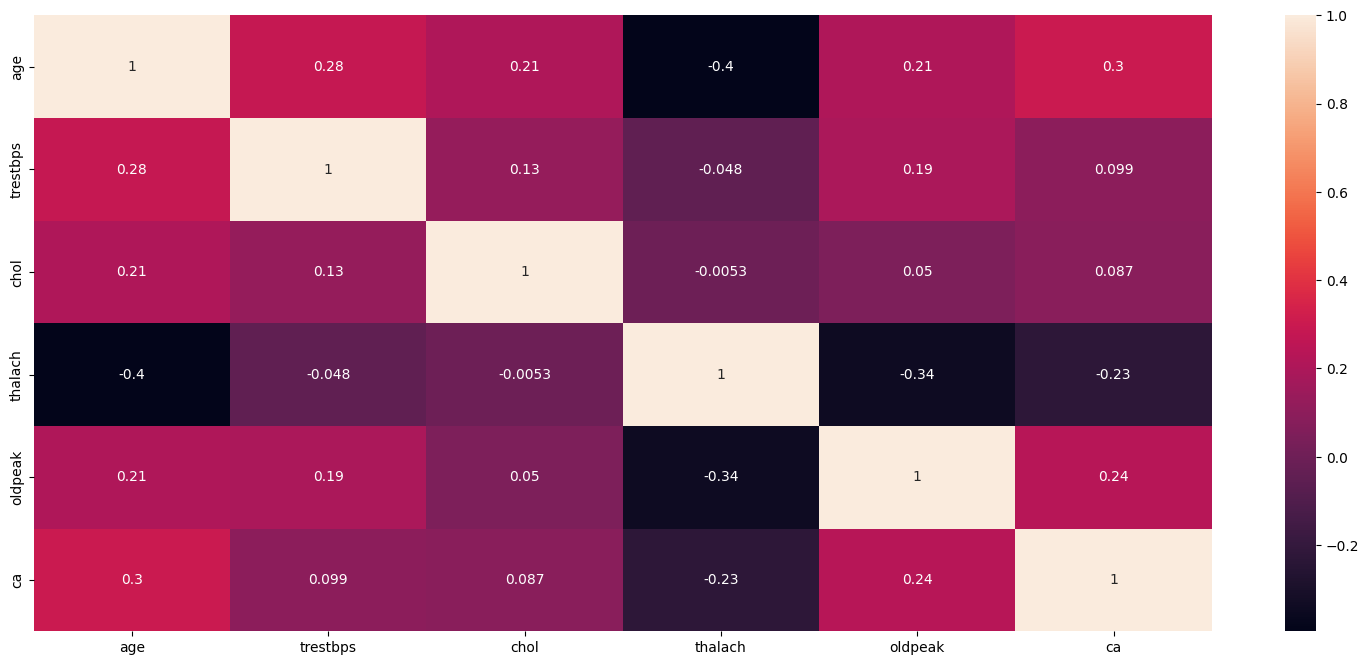

In [818]:
plt.figure(figsize=(19,8))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)

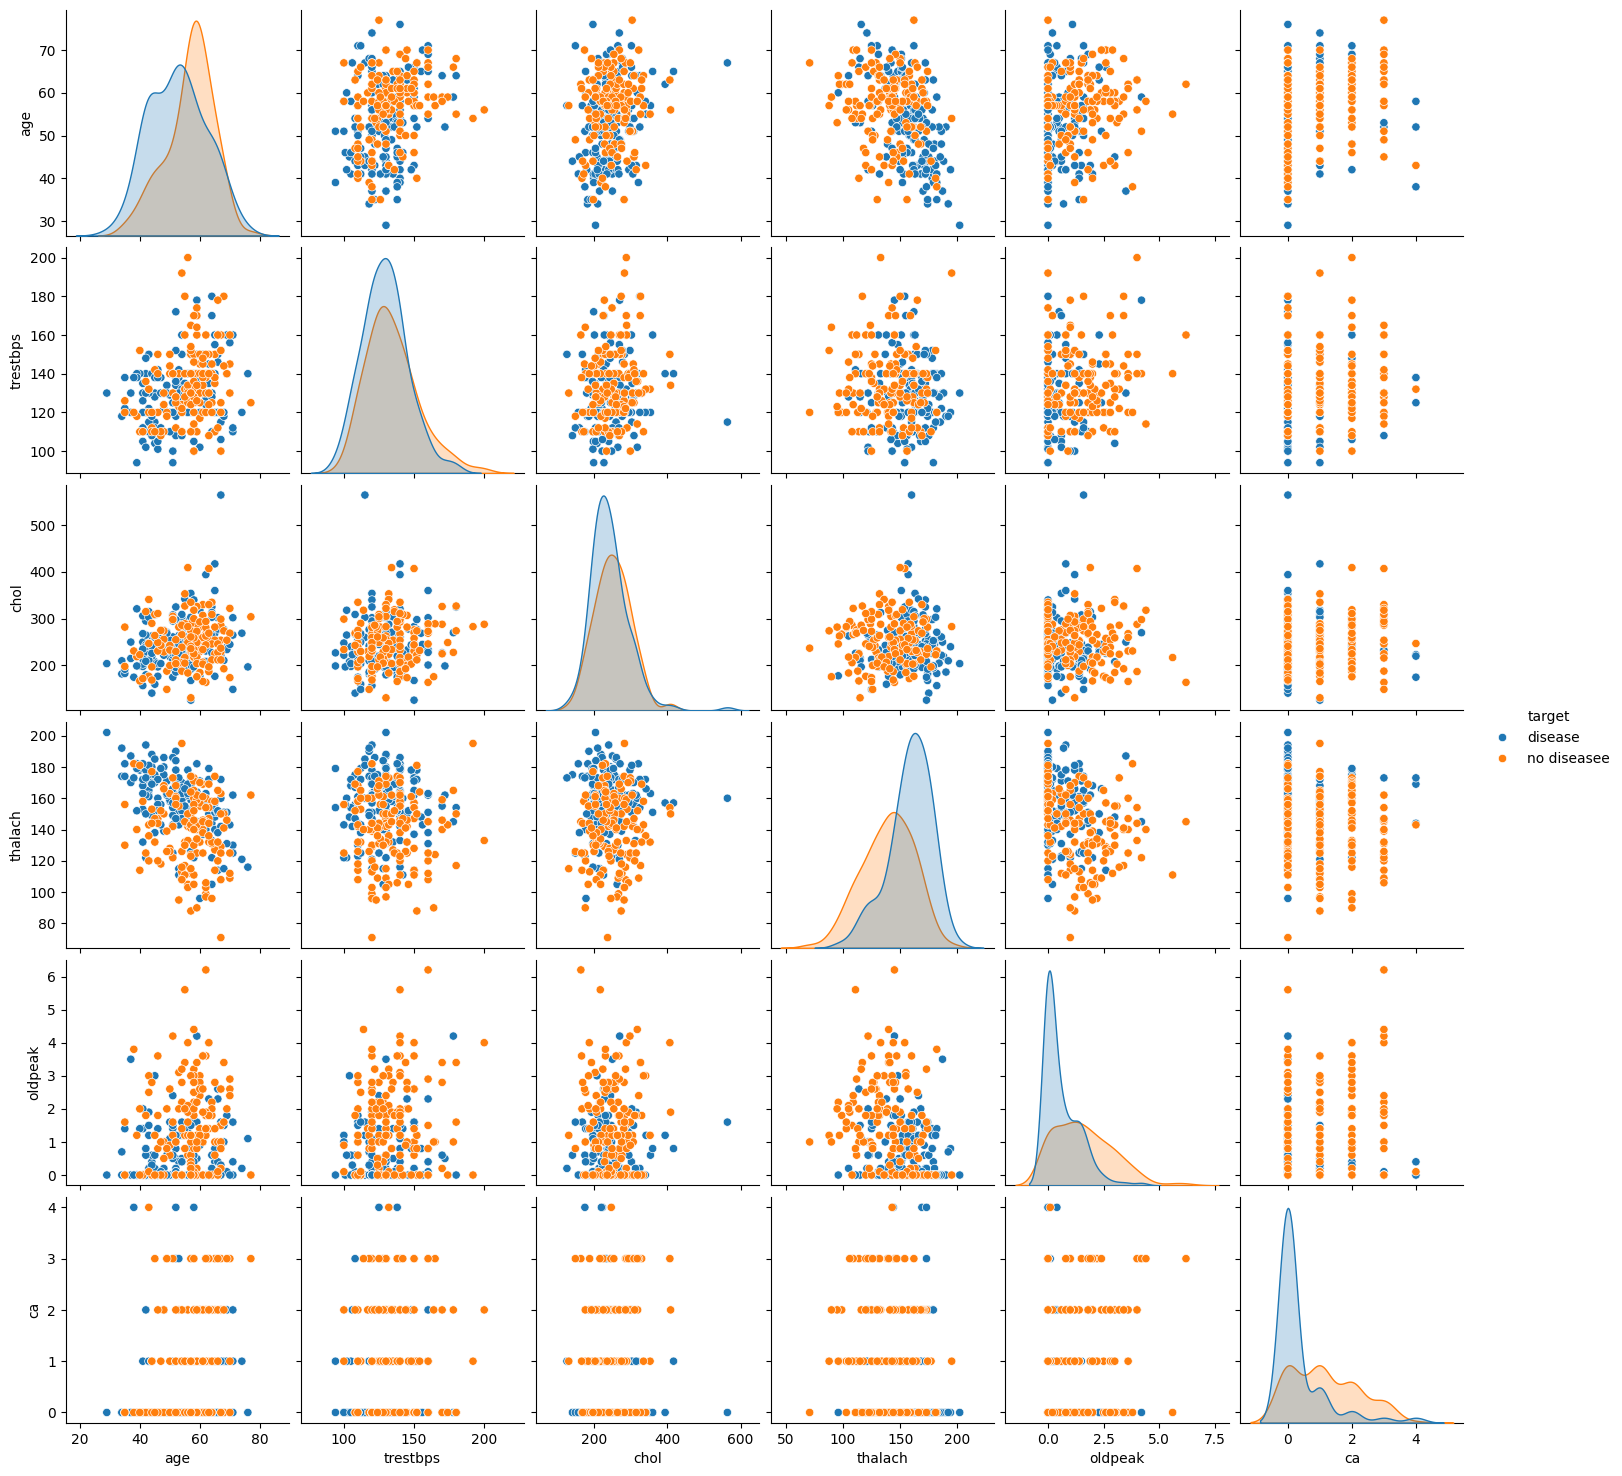

In [819]:
sns.pairplot(data=df,hue="target")

# Data preprocessing

## Split Data

In [820]:
x= df.drop("target",axis=1)
y=df["target"]

In [821]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=101,shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=101,shuffle=True)

In [822]:
print('Shape of training data :',x_train.shape)
print('Shape of valid data :',x_val.shape)
print('Shape of testing data :',x_test.shape)
print('Shape of training data :',y_train.shape)
print('Shape of valid data :',y_val.shape)
print('Shape of testing data :',y_test.shape)


Shape of training data : (211, 13)
Shape of valid data : (45, 13)
Shape of testing data : (46, 13)
Shape of training data : (211,)
Shape of valid data : (45,)
Shape of testing data : (46,)


In [823]:
Num = ['age', 'trestbps', 'chol',  'thalach',  'oldpeak', 'ca']
cat = ['sex', 'cp', 'fbs','restecg', 'slope', 'thal','exang']


In [824]:
preprocessor= ColumnTransformer([
        ("num", RobustScaler(),Num),
        ("cat",OneHotEncoder(),cat),
        ])


In [825]:
x_train=preprocessor.fit_transform(x_train)
x_val=preprocessor.transform(x_val)
x_test=preprocessor.transform(x_test)

In [826]:
y_encoder=LabelEncoder()
y_train=y_encoder.fit_transform(y_train)
y_val=y_encoder.transform(y_val)
y_test=y_encoder.transform(y_test)

# Models test

In [827]:
def eval_model(model,x_train,y_train,x_val,y_val):
  model.fit(x_train,y_train)
  train_pred = model.predict(x_train)
  val_pred = model.predict(x_val)
  train_acc = accuracy_score(y_train,train_pred)
  val_acc = accuracy_score(y_val,val_pred)
  return train_acc , val_acc , val_pred

In [828]:
def plot_confusion_matrix (cm, classes, normalize=False, title= "Confusion Matrix",cmap = plt.cm.Blues):
  plt.imshow(cm,interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]


  thresh = cm.max()/2.
  for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]> thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")



In [829]:
models= [KNeighborsClassifier(),LogisticRegression(),SVC(), DecisionTreeClassifier(), RandomForestClassifier() , GaussianNB() , AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(use_label_encoder=False, eval_metric="logloss") ]

In [830]:
models_names =["KNN", "LogisticRegression","SVC", "DecisionTree", "RandomForest" , "Naive Bayes" , "AdaBoost","GBoosting","XGBoost" ]
train_result=[]
val_result=[]


# Models evaluation

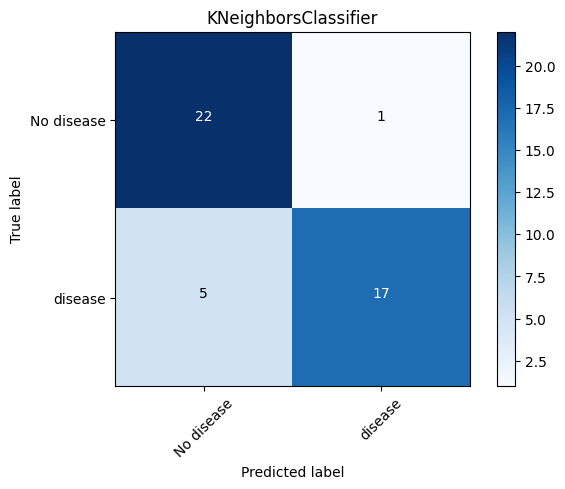

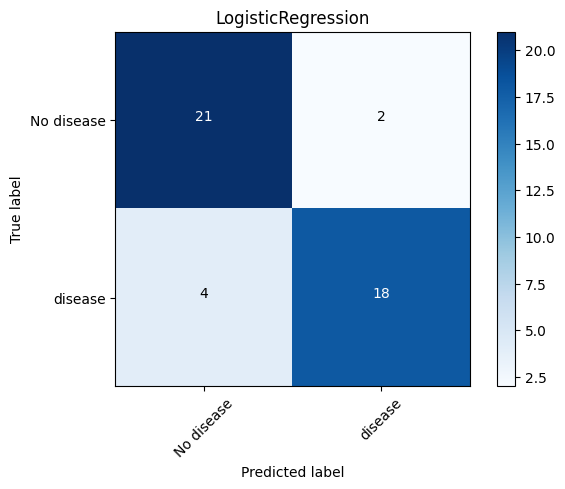

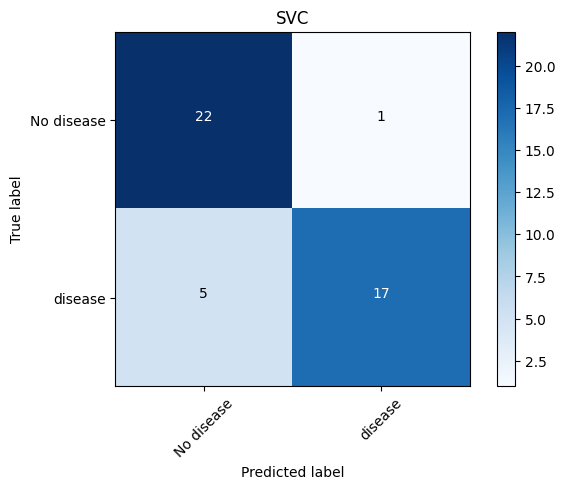

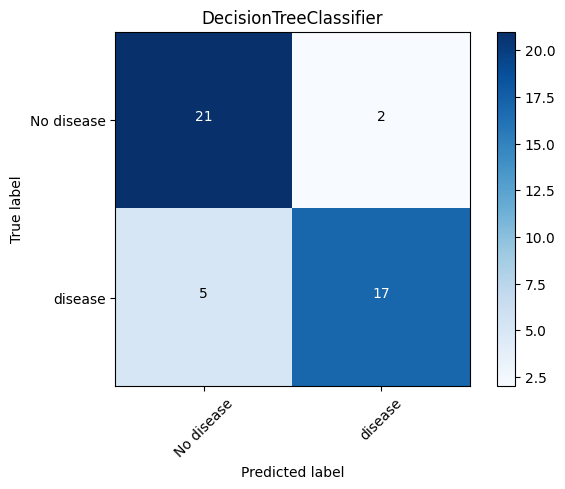

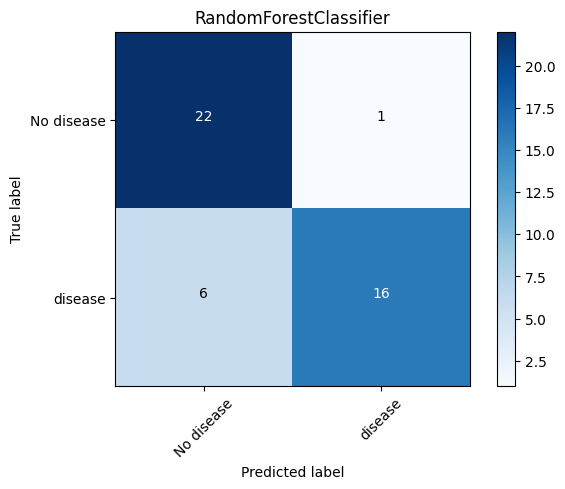

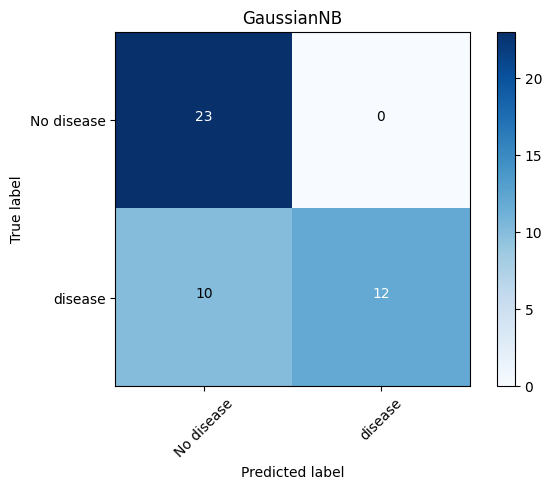

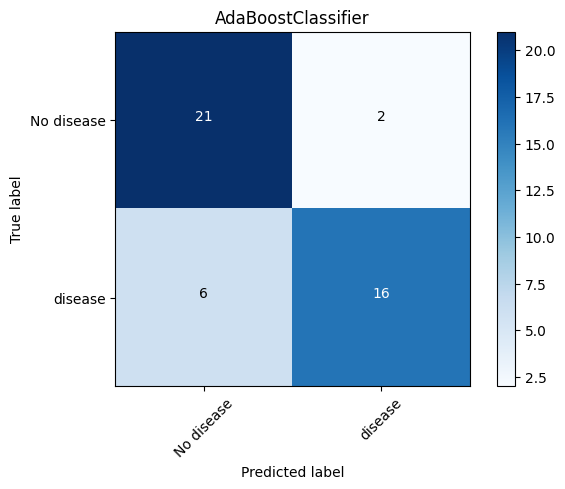

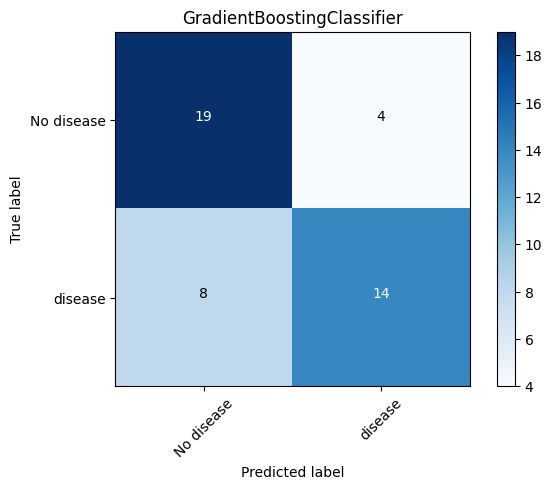

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




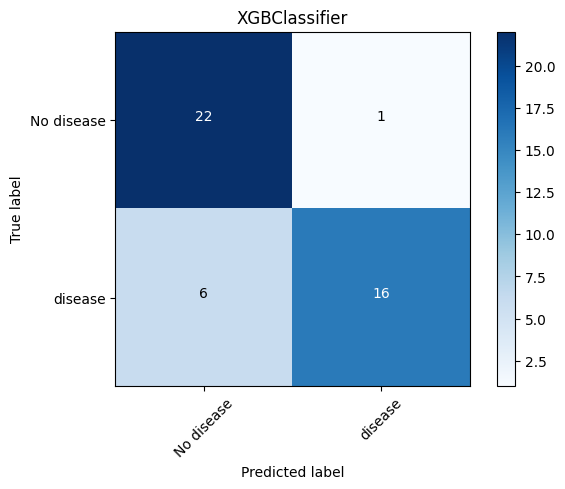

In [831]:
for model in models :
  train_acc, val_acc, y_pred =eval_model(model,x_train, y_train,x_val,y_val)
  train_result.append(train_acc)
  val_result.append(val_acc)
  cm=confusion_matrix(y_val,y_pred)
  plot_confusion_matrix(cm, classes=["No disease", "disease"], title=model.__class__.__name__)
  plt.show()

# Model Comparision

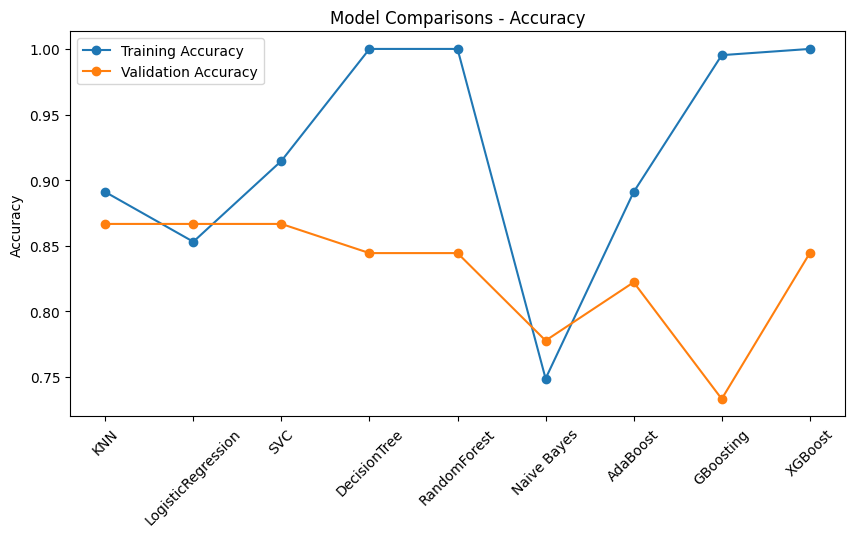

In [842]:
plt.figure(figsize=(10,5))
plt.plot(models_names,train_result,"o-",label="Training Accuracy")
plt.plot(models_names,val_result,"o-",label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()

#Logistic Regression

In [833]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
y_pred_test=lr_clf.predict(x_test)
y_pred_train= lr_clf.predict(x_train)
y_pred_val= lr_clf.predict(x_val)


In [834]:
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_validation = metrics.accuracy_score(y_val, y_pred_val)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy validation: %.2f%%" % (accuracy_validation * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 85.31%
Accuracy validation: 86.67%
Accuracy test: 78.26%


<Axes: >

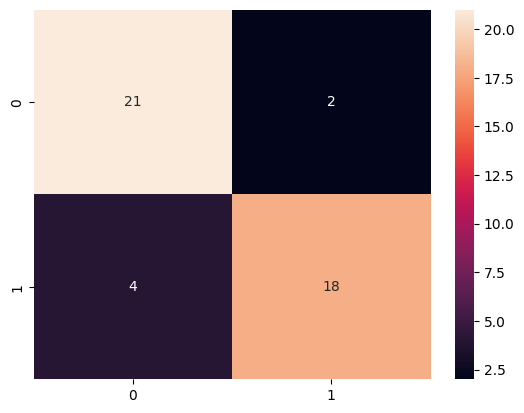

In [835]:
sns.heatmap(metrics.confusion_matrix(y_val, y_pred_val),annot=True)

<Axes: >

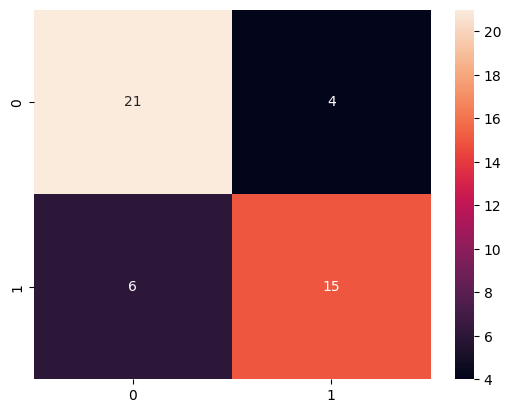

In [836]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True)

# KNN

In [837]:
x=preprocessor.fit_transform(x)
y=y_encoder.fit_transform(y)

In [838]:
# Grid Search
from sklearn.model_selection import GridSearchCV
knn_gs = KNeighborsClassifier()
param_grid={"n_neighbors":np.arange(1,20)}
knn_gscv=GridSearchCV(knn_gs,param_grid,cv=10)
knn_gscv.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [839]:
knn_gscv.best_params_

{'n_neighbors': np.int64(9)}

In [840]:
knn_gscv.best_score_

np.float64(0.8443010752688173)

In [841]:
# Cross Validation
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors = 9 )
cv_scores=cross_val_score(knn_cv,x,y,cv=10)
print (cv_scores)
print("-"*50)
print("cv_scores mean : {}".format(np.mean(cv_scores)))

[0.90322581 0.80645161 0.8        0.96666667 0.86666667 0.8
 0.93333333 0.76666667 0.76666667 0.83333333]
--------------------------------------------------
cv_scores mean : 0.8443010752688173
